<a href="https://colab.research.google.com/github/NoahGal-19/Group8/blob/main/Hersheys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Hershey_Revenue_and_Inflation_Data.csv to Hershey_Revenue_and_Inflation_Data.csv


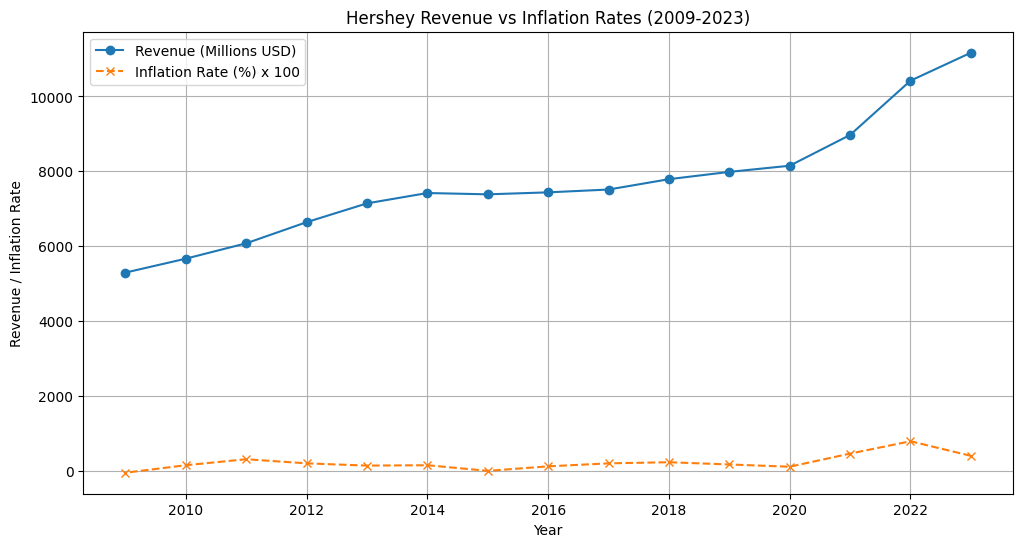

Correlation between Revenue and Inflation Rate: 0.71
R-squared value: 0.51
Regression Equation: Revenue = 554.32 * Inflation Rate + 6367.97


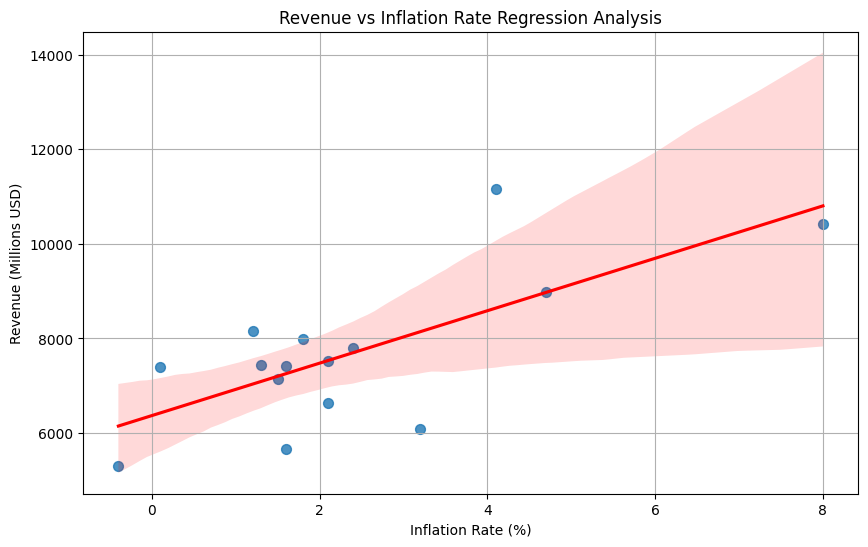

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

file_path = "Hershey_Revenue_and_Inflation_Data.csv"
data = pd.read_csv(file_path)

# Visualisation -  revenue and inflation rates over time
plt.figure(figsize=(12, 6))
plt.plot(data["Year"], data["Revenue (Millions USD)"], label="Revenue (Millions USD)", marker='o')
plt.plot(data["Year"], data["Inflation Rate (%)"] * 100, label="Inflation Rate (%) x 100", linestyle='--', marker='x')
plt.title("Hershey Revenue vs Inflation Rates (2009-2023)")
plt.xlabel("Year")
plt.ylabel("Revenue / Inflation Rate")
plt.legend()
plt.grid(True)
plt.show()

# Correlation
correlation = data["Revenue (Millions USD)"].corr(data["Inflation Rate (%)"])
print(f"Correlation between Revenue and Inflation Rate: {correlation:.2f}")

# Regression
X = data["Inflation Rate (%)"].values.reshape(-1, 1)  # Independent variable
y = data["Revenue (Millions USD)"].values  # Dependent variable
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predictions
y_pred = reg_model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2:.2f}")
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
print(f"Regression Equation: Revenue = {slope:.2f} * Inflation Rate + {intercept:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x="Inflation Rate (%)", y="Revenue (Millions USD)", data=data, line_kws={"color": "red"}, scatter_kws={"s": 50})
plt.title("Revenue vs Inflation Rate Regression Analysis")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Revenue (Millions USD)")
plt.grid(True)
plt.show()
